# Credit Card Customer Segmentation

In this project a dataset containing information about a credit card company's clients is provided. The goal of this project is to segment the data into different groups using the `K-means` algorithm. The dataset should be:
- analyzed
- prepared for data modeling
- used to find an appropriate number of clusters
- segmented
- interpreted and explained based on the results of the clustering



## Analysis of the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42) #used for reproducibility

df = pd.read_csv('customer_segmentation.csv')
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


The dataset contains the following features:
- `customer_id`: unique identifier for each customer
- `age`: customer age in years
- `gender`: customer gender (M or F)
- `dependent_count`: number of dependents of each customer
- `education_level`: level of education ("High School", "Graduate", etc.)
- `marital_status`: marital status ("Single", "Married", etc.)
- `estimated_income`: the estimated income for the customer 
- `months_on_book`: time as a customer in months
- `total_relationship_count`: number of times the customer contacted the company
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months
- `credit_limit`: customer's credit limit
- `total_trans_amount`: the overall amount of money spent on the card by the customer
- `total_trans_count`: the overall number of times the customer used the card
- `avg_utilization_ratio`: daily average utilization ratio

In [2]:
df.shape

(10127, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

The dataframe contains `14` features and `10127` observations. The feature `customer_id` identifies each customer and is not needed in the segmentation. `3` of the remaining `13` features are categorical with the `string` data type. 

In [4]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


Intepretation of the statistics above:

- The dataset has no unplausible data entries.
- The `age` feature is well distributed with mean and median around `46` years.
- The `estimated_income` is right skewed indicating there are high earning outliers.
- This is also reflected in the `credit_limit` feature.

There is no missing data:

In [5]:
df.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

## Preparation for Data Modeling

The features `gender`, `education_level` and `marital_status` are categorical and need to be encoded for further analysis.

For `gender` male (M) is replaced by `1` and female (F) by `0`:

In [6]:
df_modif = df.copy()
df_modif['gender'] = df_modif['gender'].map({'M': 1, 'F': 0})

The `education_level` is on the ordinale scale and has 6 unique values. It is possible to rank the levels from lowest to highest which will be performed by the following order:
- Uneducated: `0`
- High School: `1`
- College: `2`
- Graduate: `3`
- Post-Graduate: `4`
- Doctorate: `5`

In [7]:
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
df_modif['education_level'] = df_modif['education_level'].map(education_mapping)                                      

The `marital_status` is on the nominal scale which means a ranking is not objectively possible. Therefore *one-hot encoding* is used to create dummy variables for this column:

In [8]:
df_modif = df_modif.join(pd.get_dummies(df_modif['marital_status'],drop_first=True))
df_modif.drop(labels='marital_status', axis=1, inplace=True)
df_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Married,Single,Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


The K-means algorithm needs scaled features to work appropriately. This is not the case for the dataset given. For instance, the range of the `estimated_income` feature differs significantly from the `dependent_count`feature. Therefore all features except `customer_id` are scaled in the following:

In [9]:
df_modif.drop(labels='customer_id', axis=1, inplace=True)
columns = df_modif.columns

scaler = StandardScaler()
scaler.fit(df_modif)
df_scaled = scaler.transform(df_modif)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = columns
df_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Married,Single,Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Choosing K

In the steps before the dataset was prepared for machine learning. Now the best number of clusters used in the segmentation is devised by analyzing the inertia metric. Herefore various models are generated to compare their inertias in an *Elbow Curve*.

Text(0.5, 1.0, 'Inertia vs Number of Clusters')

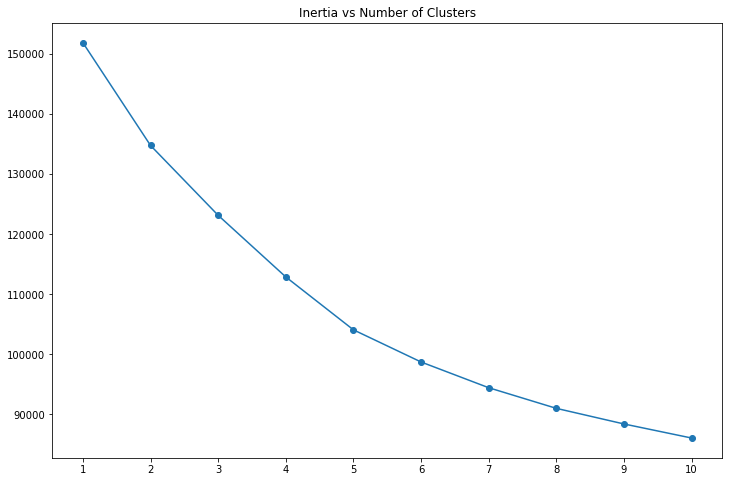

In [10]:
inertias = []
max_clusters = 10

for k in range(1,max_clusters+1):
    model = KMeans(n_clusters=k)
    model.fit_predict(df_scaled)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.xticks(ticks=range(1, max_clusters+1), labels=range(1, max_clusters+1))
plt.title('Inertia vs Number of Clusters')    
    

There is no distinct elbow in the plot above. However, based on the result a value of `6` is chosen for `K`.

In [11]:
model = KMeans(n_clusters=6)
clusters = model.fit_predict(df_scaled)

#assign clusters to the observations in the dataset
df['Cluster'] = clusters + 1

## Analyzing the Results

It can be observed that cluster 2 is the largest while cluster 3 is the smallest:

In [12]:
df['Cluster'].value_counts()

2    2790
6    2480
4    1785
5    1427
1     911
3     734
Name: Cluster, dtype: int64

Now each numeric variable is grouped by the `Cluster` column and the mean is plotted in a bar chart:

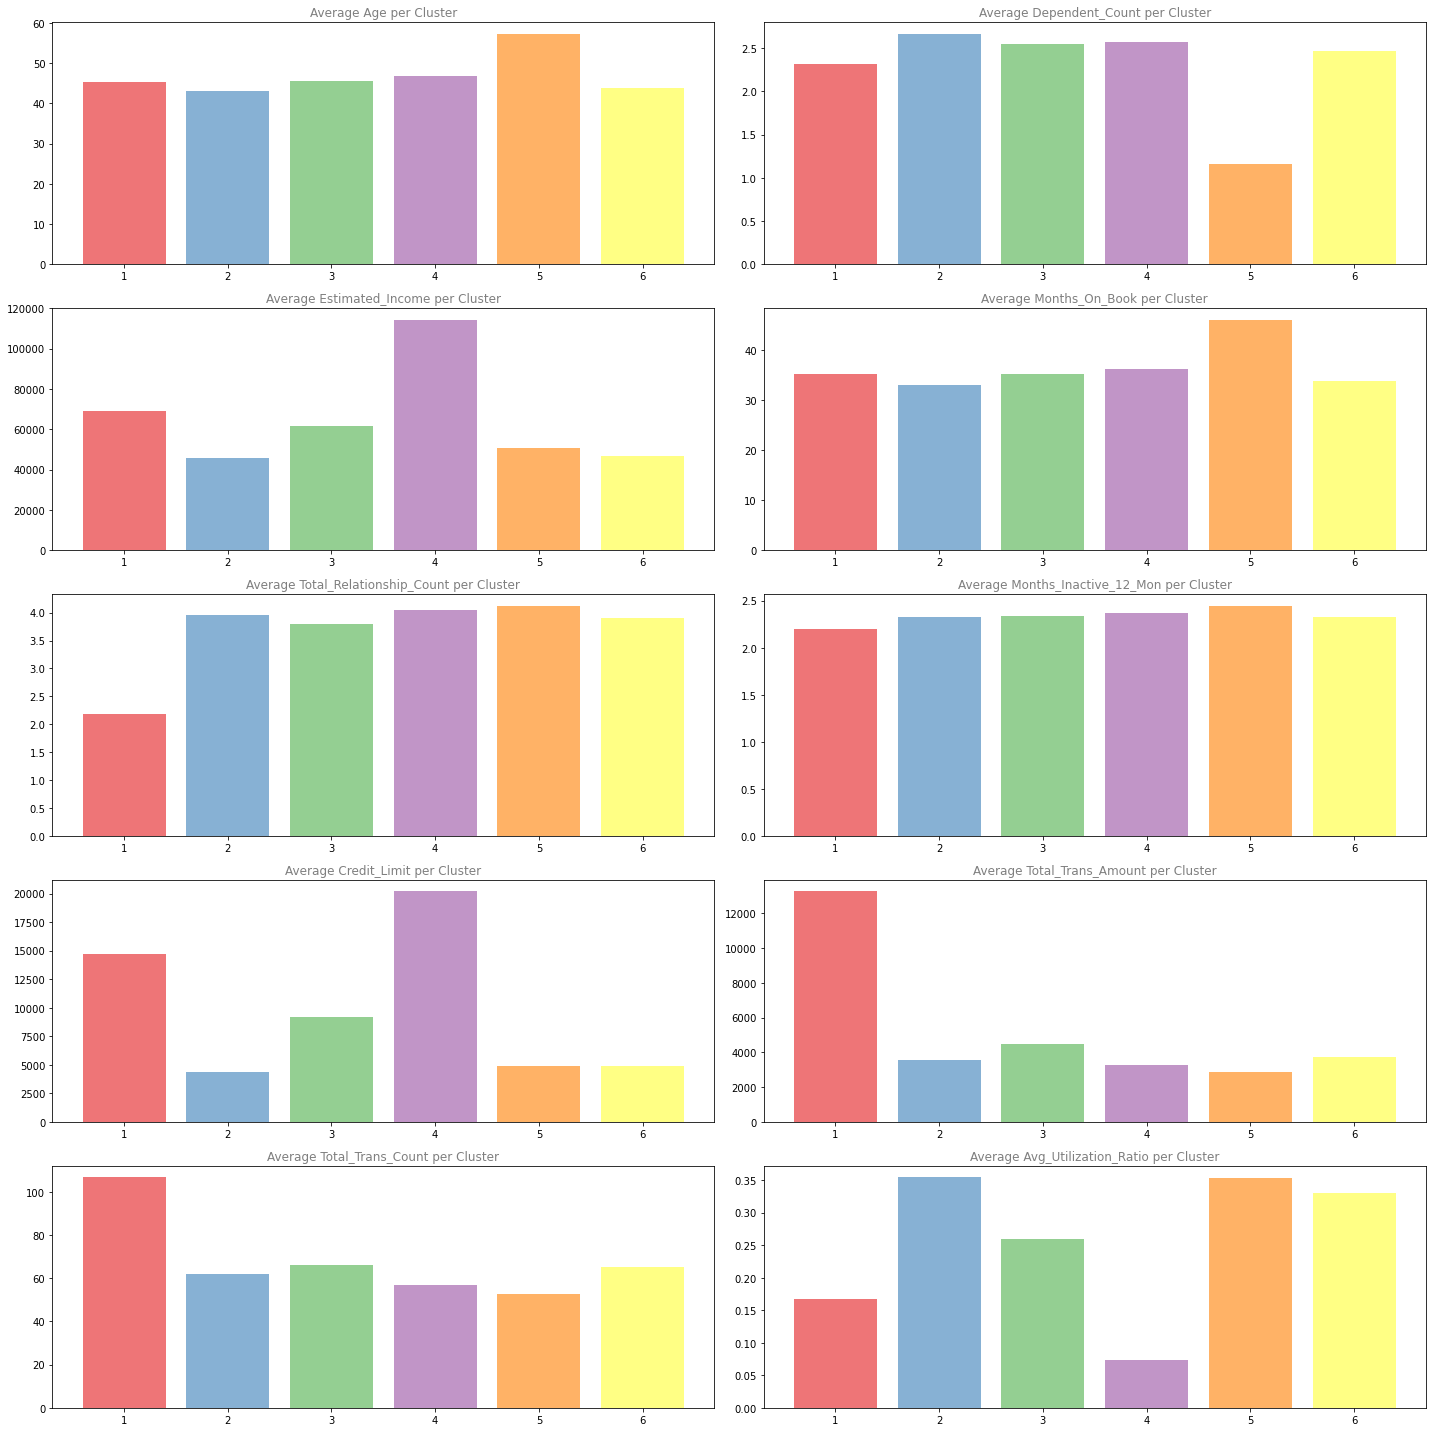

In [13]:
numeric_columns = ['age','dependent_count','estimated_income','months_on_book','total_relationship_count','months_inactive_12_mon','credit_limit','total_trans_amount','total_trans_count','avg_utilization_ratio']

groups = df[numeric_columns].groupby(df['Cluster']).mean()

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

The following insights can be gained:
- Cluster 1 contacted the company the least, spend the most money and used the credit card the most.
- Cluster 4 has the highest credit card limit.
- Cluster 5 contains the oldest customers who are also customers the longest. Cluster 5 also has the least dependents per customer.

This is also represented visually:

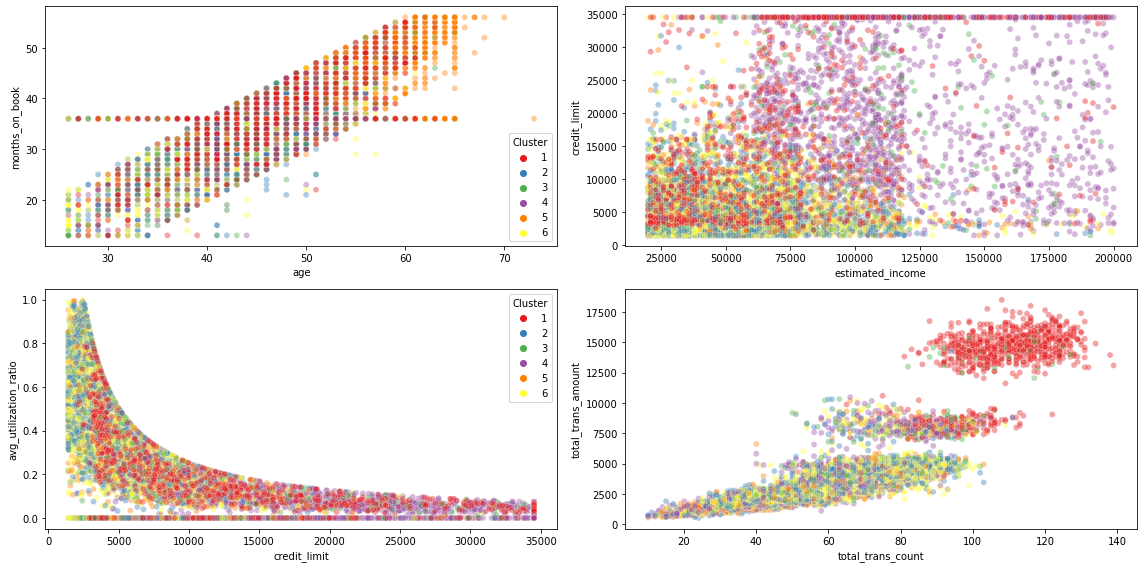

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

sns.scatterplot(x='age', y='months_on_book', hue='Cluster', data=df, palette='Set1', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster', data=df, palette='Set1', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster', data=df, palette='Set1', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='Cluster', data=df, palette='Set1', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

The features `gender`, `education_level` and `marital_status` are categorical and their occurence in the different clusters is given by:

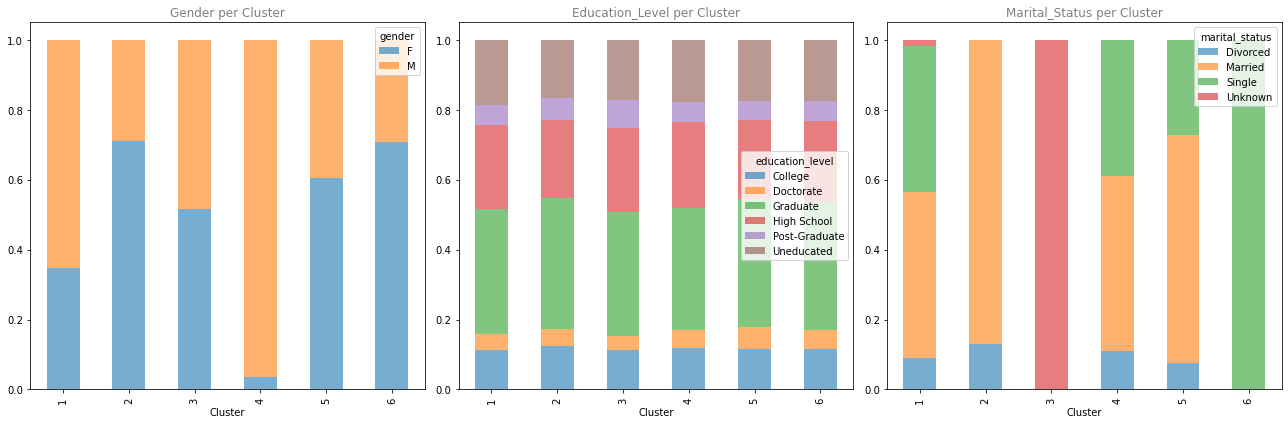

In [15]:
columns = ['gender','education_level','marital_status']

fig = plt.figure(figsize=(18, 6))
for i, column in enumerate(columns):
    df_plot = pd.crosstab(index=df['Cluster'],columns=df[column],values=df[column], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    df_plot.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'{column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

The following can be observed:
- cluster 2 consists nearly completely of married customers
- cluster 4 consists nearly completely of males
- cluster 6 consists only of single customers
- marital status of cluster 3 is unknown
- the education level is well distributed over all clusters